In [4]:
import os
import torch

In [48]:
FEAT_PATH="../cache/word2vec-2000/computer/computer_instruction_vtoken_t5-small_feats.bin"

In [84]:
TARGETS_PATH="../cache/word2vec-2000/computer/computer_hint-Hint:-the-hidden-word-is-an-example-of-a-machine._vtoken_t5-base_targets.bin"

In [1]:
FEAT_PATH_1="../cache/word2vec-2000/computer/computer_hint-Hint:-the-hidden-word-is-an-example-of-a-machine._average_t5-base_feats.bin"

In [2]:
TARGETS_PATH_1="../cache/word2vec-2000/computer/computer_hint-Hint:-the-hidden-word-is-an-example-of-a-machine._average_t5-base_targets.bin"

In [49]:
features = torch.load(FEAT_PATH)

In [5]:
targets = torch.load(TARGETS_PATH)

NameError: name 'TARGETS_PATH' is not defined

In [6]:
features_1 = torch.load(FEAT_PATH_1)

In [7]:
targets_1 = torch.load(TARGETS_PATH_1)

In [9]:
features_1[0]

tensor([-1.9035e-01, -2.0756e-02,  1.4742e-03, -7.3129e-02,  3.2367e-02,
         1.2296e-01, -2.9180e-03, -1.2492e-01, -2.1187e-01, -1.0941e-03,
        -1.9384e-01,  7.9883e-02,  6.8377e-02,  1.1943e-01, -1.6058e-01,
        -1.6961e-02, -2.9006e-04, -1.2371e-01,  3.3879e-03, -8.7355e-02,
        -5.1600e-02, -7.0051e-02,  2.4025e-01,  9.6830e-02,  1.3916e-01,
         1.7087e-01, -3.0667e-02, -2.0637e-02, -7.5697e-02,  7.9274e-02,
        -7.1094e-02,  5.1662e-02,  6.5846e-02,  1.2424e-02, -4.9335e-02,
        -3.0260e-03, -7.5056e-02, -5.4538e-02,  1.1679e-01,  1.7612e-01,
         6.1680e-02, -1.7262e-01,  1.0736e-01, -3.2432e-02, -3.9107e-01,
         1.2820e-01,  6.4413e-02,  1.0084e-01, -1.7156e-02, -5.4189e-03,
        -4.7027e-02, -1.3161e-01, -2.2391e-01, -4.1847e-02, -4.0864e-01,
         2.0786e-02,  3.6176e-01, -1.7265e-02,  3.9553e-02,  1.7054e-02,
        -1.4731e-01, -2.5216e-02,  7.0831e-02, -2.3673e-02,  7.0381e-02,
        -1.9648e-01, -7.6916e-02,  5.9377e-02, -2.1

In [51]:
warm_start_idxs = np.array([669, 1705, 814, 810, 1441]) - 1
warm_start_features = features[warm_start_idxs]
warm_start_features

tensor([[  3.5648,   6.9436,  -5.1653,  ...,  -1.9717,   9.7444,  16.8352],
        [-12.5641,  11.8132,  18.5061,  ...,  39.3282,  -0.4116,  10.1337],
        [  2.7732,  12.1398, -19.5789,  ...,  35.2643,  14.2678,  -0.1982],
        [ -7.7299,  24.5637,   4.0407,  ...,   0.4481,  -7.2587,  11.9611],
        [-28.3297,  22.7127,  17.8175,  ...,  -1.9200,  18.2631,  14.2007]])

In [58]:
torch.linalg.vector_norm(warm_start_features, dim=1).mean()

tensor(594.3438)

In [77]:
torch.linalg.vector_norm(features, dim=1)

tensor([657.1949, 508.1976, 508.8861,  ..., 544.4460, 562.8709, 718.9062])

In [57]:
torch.linalg.vector_norm(features, dim=1).mean()

tensor(606.4777)

In [68]:
torch.allclose(torch.nn.functional.normalize(features) * torch.linalg.vector_norm(features, dim=1)[:, None], features)

True

In [73]:
torch.linalg.vector_norm(torch.nn.functional.normalize(features) * torch.linalg.vector_norm(features, dim=1)[:, None], dim=1)

tensor([657.1949, 508.1976, 508.8861,  ..., 544.4460, 562.8709, 718.9062])

In [74]:
torch.linalg.vector_norm(torch.nn.functional.normalize(features) * torch.linalg.vector_norm(features, dim=1).mean(), dim=1)

tensor([606.4778, 606.4777, 606.4777,  ..., 606.4777, 606.4777, 606.4777])

In [76]:
import matplotlib.pyplot as plt

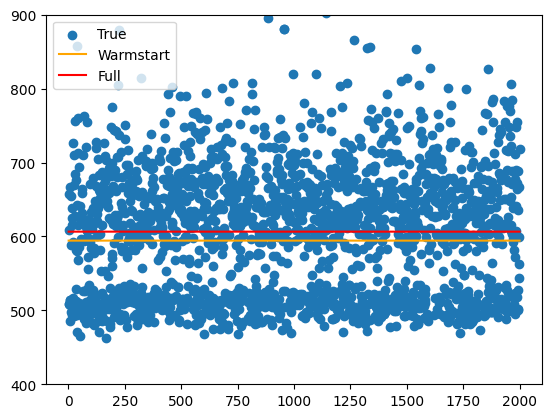

In [84]:
true_norms = torch.linalg.vector_norm(features, dim=1).numpy()
warmstart_norm = torch.linalg.vector_norm(warm_start_features, dim=1).mean().item()
full_norm = torch.linalg.vector_norm(features, dim=1).mean().item()
plt.scatter(np.arange(len(true_norms))+1, true_norms, label="True")
plt.plot(np.arange(len(true_norms))+1, np.ones(len(true_norms))*warmstart_norm, label="Warmstart", color="orange")
plt.plot(np.arange(len(true_norms))+1, np.ones(len(true_norms))*full_norm, label="Full", color="red")
plt.ylim(400, 900)
plt.legend()

In [19]:
features_1.shape

torch.Size([2000, 768])

In [26]:
torch.linalg.vector_norm(features_1, dim=1).mean()

tensor(2.9280)

In [27]:
torch.linalg.vector_norm(features_1, dim=1).std()

tensor(0.0392)

In [29]:
torch.nn.functional.normalize(features_1)

tensor([[-6.4641e-02, -7.0486e-03,  5.0063e-04,  ...,  6.1389e-03,
          1.9684e-02, -5.6223e-02],
        [-6.8534e-02, -9.1896e-03, -2.8394e-03,  ...,  9.7066e-03,
          2.1683e-02, -5.7808e-02],
        [-6.3370e-02, -1.5941e-02, -4.5123e-03,  ...,  1.0765e-02,
          1.8200e-02, -5.3939e-02],
        ...,
        [-5.8959e-02, -2.5961e-03,  4.3186e-03,  ...,  5.1074e-03,
          2.3007e-02, -6.3206e-02],
        [-6.3650e-02, -9.9292e-03,  1.3337e-02,  ...,  1.1943e-02,
          2.9104e-02, -5.3371e-02],
        [-6.6769e-02, -1.1696e-02, -9.7334e-05,  ...,  1.1682e-02,
          2.1035e-02, -5.7622e-02]])

In [ ]:
features[]

In [31]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('../data/twentyquestions/datasets/word2vec-2000/computer.csv')

In [ ]:
np.array([669, 1705, 814, 810, 1441]) - 1

In [87]:
dataset[-20:]

,Words,Similarity
1980,cauldron,0.056735
1981,festival,0.053112
1982,lime,0.052685
1983,headsman,0.052429
1984,winterberry,0.050194
1985,amaretto,0.049924
1986,fissure,0.046937
1987,quintet,0.044933
1988,mustard,0.043724
1989,workingman,0.042441


In [35]:
dataset.iloc[np.array([669, 1705, 814, 810, 1441]) - 1]

,Words,Similarity
668,sewer,0.207805
1704,suspenders,0.121404
813,gatehouse,0.195282
809,congressman,0.195763
1440,woodwork,0.147072


In [47]:
dataset[dataset['Words']=='paradox']

,Words,Similarity


In [69]:
U,S,V = torch.pca_lowrank(torch.nn.functional.normalize(features_1), q=768)

In [74]:
projected_matrix = torch.matmul(torch.nn.functional.normalize(features_1), V[:, :305])

In [66]:
import numpy as np
np.linalg.matrix_rank(torch.nn.functional.normalize(features_1).numpy(), tol=0.1)

305

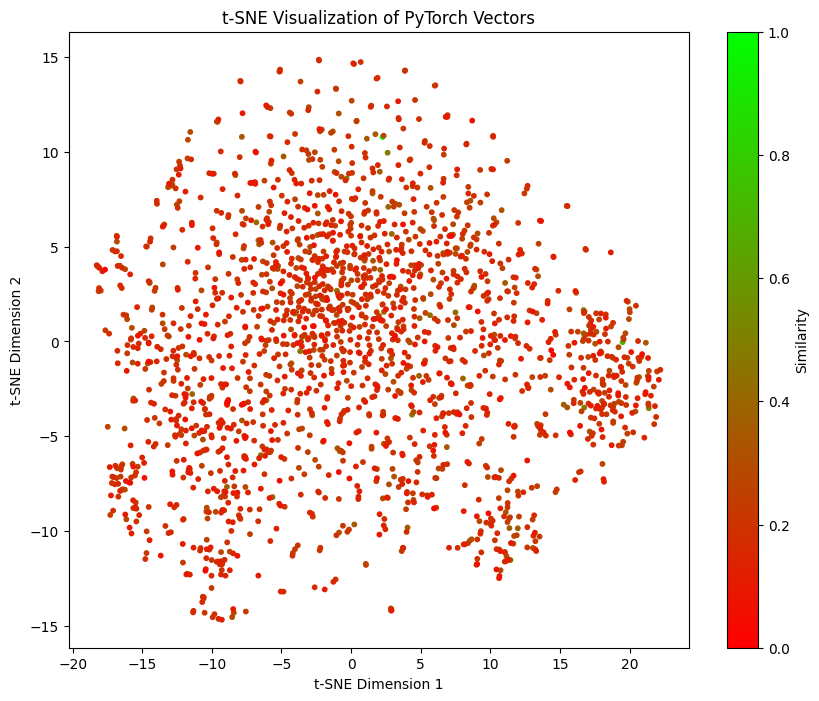

In [86]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Convert PyTorch tensor to NumPy array
vectors_numpy = features.numpy()

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_numpy)

colors = [(1, 0, 0), (0, 1, 0)]  # Red to green
cmap = LinearSegmentedColormap.from_list('custom', colors)

vector_targets = targets.squeeze().numpy()

# Visualize the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=vector_targets, cmap=cmap, s=10)  # Adjust the size 's' as needed
plt.title('t-SNE Visualization of PyTorch Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Similarity')
plt.show()

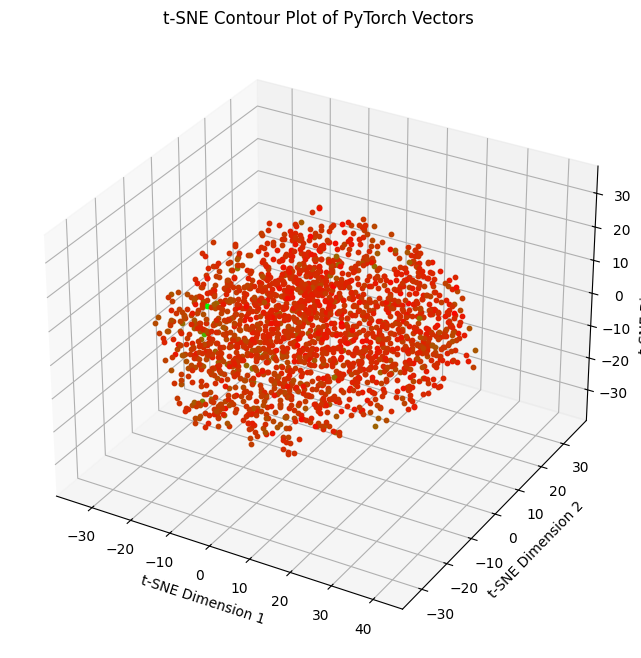

In [82]:
import torch
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a collection of PyTorch vectors stored in a tensor
# Let's say your tensor has shape (N, D) where N is the number of vectors and D is the dimensionality of each vector
# Replace `your_tensor` with your actual tensor
your_tensor = features_1  # projected_matrix

# Convert PyTorch tensor to NumPy array
vectors_numpy = your_tensor.numpy()

# Perform t-SNE dimensionality reduction with 3 components
tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_numpy)

# Create a meshgrid of t-SNE coordinates
x_min, x_max = np.min(vectors_tsne[:, 0]), np.max(vectors_tsne[:, 0])
y_min, y_max = np.min(vectors_tsne[:, 1]), np.max(vectors_tsne[:, 1])
z_min, z_max = np.min(vectors_tsne[:, 2]), np.max(vectors_tsne[:, 2])

x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
z_values = np.linspace(z_min, z_max, 100)

xx, yy, zz = np.meshgrid(x_values, y_values, z_values)

# Interpolate values for the contour plot
interp_values = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()]).T
interp_colors = targets_1.squeeze().numpy()

# Normalize colors between 0 and 1
min_value = interp_colors.min()
max_value = interp_colors.max()
normalized_colors = (interp_colors - min_value) / (max_value - min_value)

# Create colors transitioning from red to green
colors = np.array([(1 - c, c, 0) for c in normalized_colors])

# Plot the contour plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(colors)):
    ax.scatter(vectors_tsne[i, 0], vectors_tsne[i, 1], vectors_tsne[i, 2], color=colors[i], s=10)

ax.set_title('t-SNE Contour Plot of PyTorch Vectors')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()